In [1]:
%matplotlib notebook
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
import plotly
import numpy as np   
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

In [2]:
DiffEqs = NonLinearODEs(1);
DiffEqs.setDomain(0.0,100.0);
DiffEqs
h = 0.1;

In [3]:
def f(y,t):
    v = vec(3);
    v.from_Array([y[0][3]*(np.cos(y[0][3])-np.sin(y[0][3])),
                  y[0][3]*(-np.cos(y[0][3])-np.sin(y[0][3])),
                  y[0][2]*(np.cos(y[0][3])+np.sin(y[0][3]))-y[0][1]*(np.cos(y[0][3])-np.sin(y[0][3]))
                 ]);
    return v;
def m(t):
    I = spmat(3,3);
    return I;

In [4]:
DiffEqs.setCoeff(m,f)
IC = vec(3);
IC.from_Array([0.1,0.2,0.15])
DiffEqs.setIC([IC]);

In [5]:
[H, P] = DiffEqs.Euler(h)
X = [p[1] for p in P]
Y = [p[2] for p in P]
Z = [p[3] for p in P]
print(X[-1],Y[-1],Z[-1])

-0.3757005218964112 -0.3757005218990113 -2.7526268135053154e-13


In [6]:
Energy = [];
for i in range(len(X)):
    Energy = Energy+[0.5*(X[i]**2+Y[i]**2+Z[i]**2)]


<IPython.core.display.Javascript object>


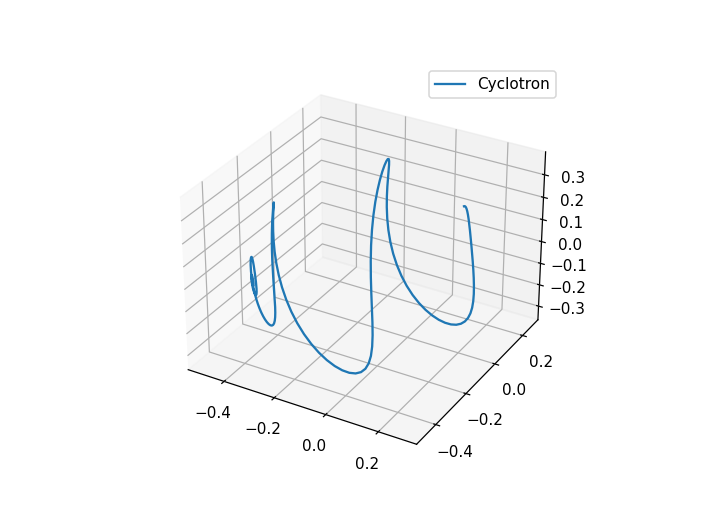

<IPython.core.display.Javascript object>


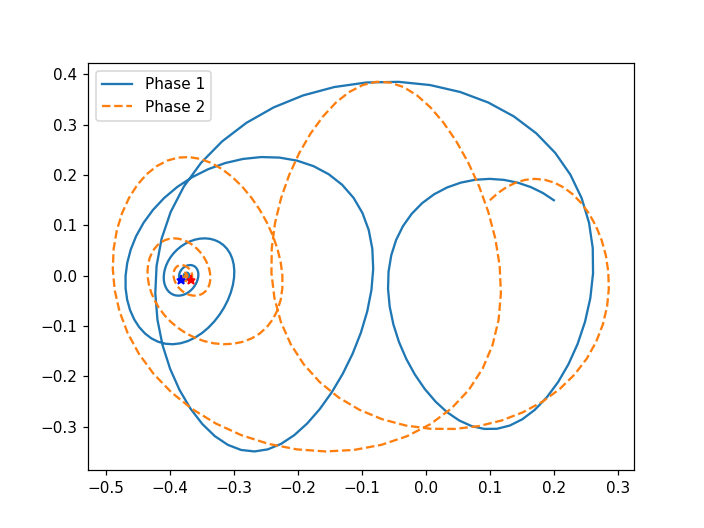

<IPython.core.display.Javascript object>


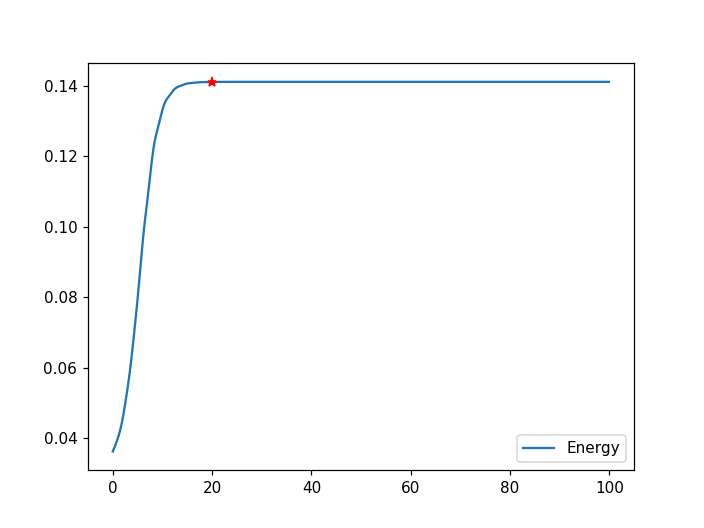

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z)
plt.legend(["Cyclotron"])
plt.show()
plt.figure()
plt.plot(Y,Z)
plt.plot(X,Z,"--")
I = int(20/h);
plt.plot(Y[I],Z[I],"b*")
plt.plot(X[I],Z[I],"r*")
plt.legend(["Phase 1","Phase 2"])
plt.figure()
plt.plot(H,Energy);
plt.plot(H[I],Energy[I],"r*")
plt.legend(["Energy"])

<IPython.core.display.Javascript object>


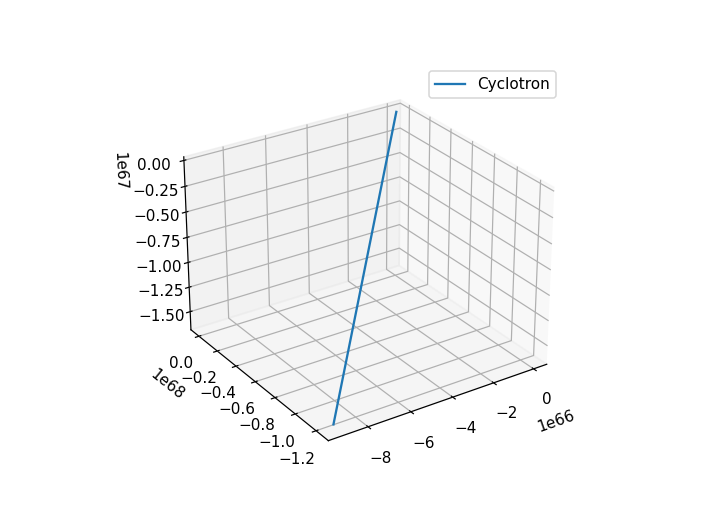

In [8]:
DiffEq = NonLinearODEs(1);
DiffEq.setDomain(0.0,1.0);
def f(y,t):
    v = vec(3);
    v.from_Array([y[0][3]*(np.cos(y[0][3])-np.sin(y[0][3])),
                  y[0][3]*(-np.cos(y[0][3])-np.sin(y[0][3])),
                  y[0][2]*(np.cos(y[0][3])+np.sin(y[0][3]))-y[0][1]*(np.cos(y[0][3])-np.sin(y[0][3]))
                 ]);
    return v;
#def f(y,t):
#    v = vec(3);
#    v.from_Array([-y[0][1],-y[0][2],-y[0][3]]);
#    return v;
def m(t):
    I = spmat(3,3);
    return I;
DiffEq.setCoeff(m,f)
IC = vec(3);
IC.from_Array([0.1,0.1,0.1])
DiffEq.setIC([IC]);
[H, P] = DiffEq.SympEuler(h)
X = [p[1] for p in P]
Y = [p[2] for p in P]
Z = [p[3] for p in P]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X, Y, Z)
plt.legend(["Cyclotron"])
plt.show()

<IPython.core.display.Javascript object>


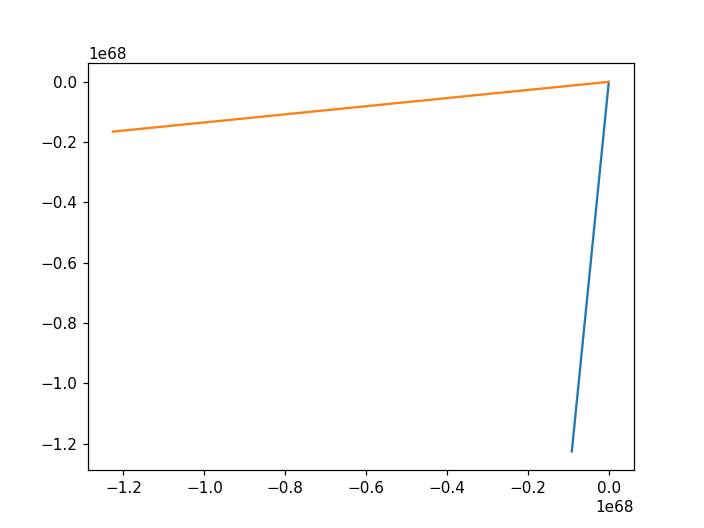

In [9]:
plt.figure()
plt.plot(X,Y)
plt.plot(Y,Z)